# Importing required packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from imblearn import under_sampling, over_sampling

import scikitplot as skplt

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm 
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rc('figure',figsize=(10,6))
sns.set_context('paper',font_scale=2)

# Importing dataset

In [2]:
stroke_data = pd.read_csv('D:\Documenten\Experimentele Psychologie\Master Experimentele\CAED\healthcare-dataset-stroke-data.csv')

# Inspecting the data

In [3]:
## inspecting the first 10 rows of the data
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


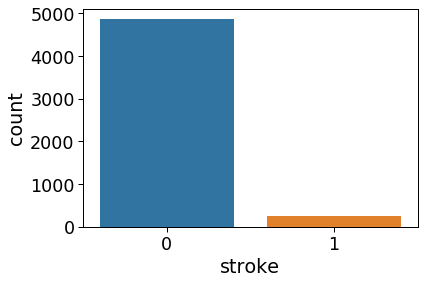

In [4]:
## checking if the dataset is balanced
stroke_data['stroke'].value_counts()
sns.countplot(stroke_data['stroke'])

In [5]:
print(stroke_data['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


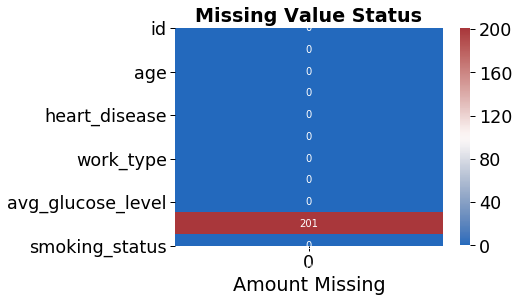

In [6]:
## checking for missing values
# option 1 
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [7]:
# option 2
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data preprocessing

In [8]:
## filling in missing values of bmi, but not with the standard method like filling in the missing values with the mean or median
## but with a decision tree model based on gender and age of the other samples that makes a better predicition of the bmi of someone
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = stroke_data[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
stroke_data.loc[Missing.index,'bmi'] = predicted_bmi
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,30.556098,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


# Exploratory data analysis

In [9]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

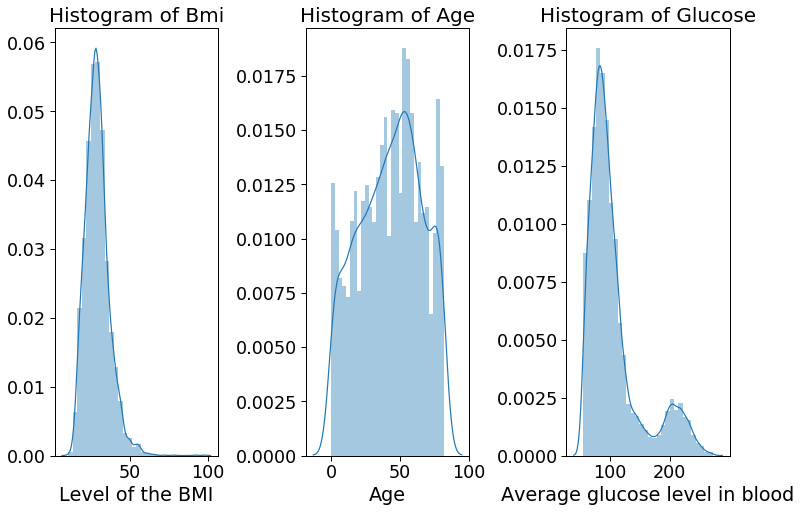

In [10]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(stroke_data.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(stroke_data.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(stroke_data.avg_glucose_level,
          title='Glucose', 
          xlabel='Average glucose level in blood',
          ax=axes[2])

plt.show()

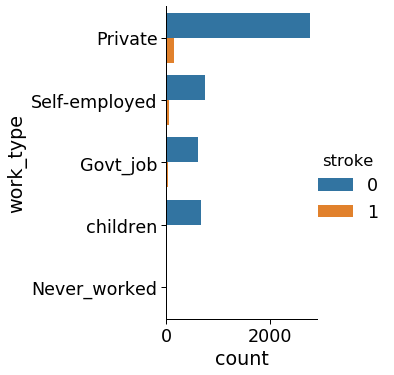

In [11]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            data=stroke_data)
# here it seems that you are more likely to get a stroke when you work in 
# the private sector or are self-employed. Whereas working for the government,
# or being a child, then you are less likely to develop a stroke
# perhaps stress and work pressure is a possible explanation.

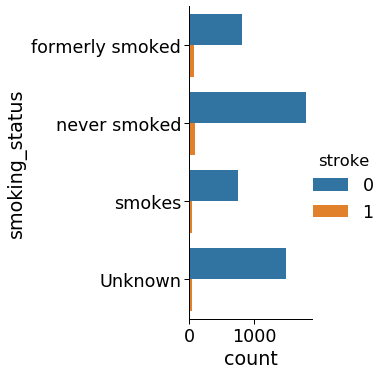

In [12]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            data=stroke_data)
# surprisingly, it seems that smoking status does not have a are distributed 
# in a way that doesn't tell us anything confounding about stroke-positive individuals

<Figure size 1224x504 with 0 Axes>

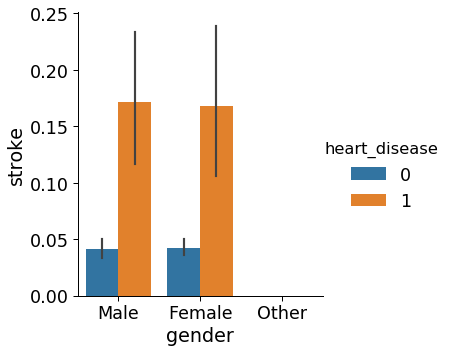

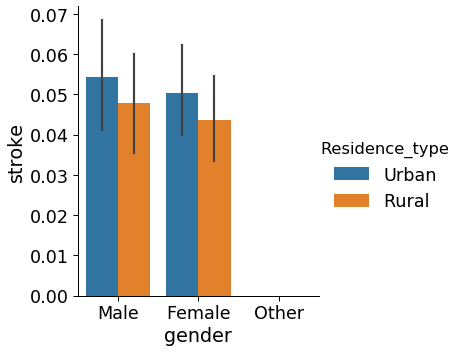

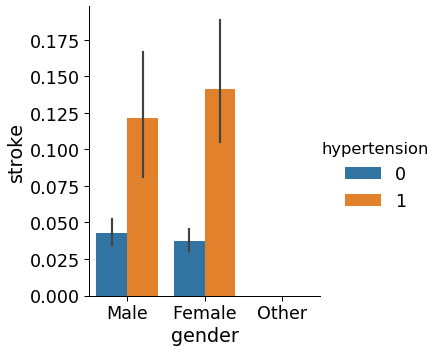

In [13]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="Residence_type", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="hypertension", kind="bar", data=stroke_data)
plt.show()

# in these graphs I see that having a heart disease and being hyper tensed 
# correlates with developing a stroke
# it also seems that residence type is correlated with stroke (e.g. possible explanation could be that there is more polution in urban areas)
# gender is less likely to play a role, because this is quite the same distributed

In [14]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(stroke_data[col])
    stroke_data[col] = label_encoder.transform(stroke_data[col])

In [16]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.879487,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Downsampling the dataset to a balanced design

In [17]:
from sklearn.utils import resample
# Separate majority and minority classes
stroke_data_majority = stroke_data[stroke_data.stroke==0]
stroke_data_minority = stroke_data[stroke_data.stroke==1]
 
# Downsample majority class
stroke_data_majority_downsampled = resample(stroke_data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=249,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
stroke_data_downsampled = pd.concat([stroke_data_majority_downsampled, stroke_data_minority])
 
# Display new class counts
stroke_data_downsampled.stroke.value_counts()

1    249
0    249
Name: stroke, dtype: int64

In [18]:
stroke_data_downsampled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3742,29546,1,71.0,0,0,1,0,0,99.76,33.40000,1,0
1375,14241,1,17.0,0,0,0,2,1,85.07,21.10000,2,0
2003,69482,0,31.0,0,0,1,0,1,81.71,32.70000,0,0
3708,36825,0,39.0,0,0,1,2,0,103.12,29.90000,1,0
1183,13602,1,73.0,1,0,1,3,0,102.06,30.47619,0,0


# Seperating the downsampled dataset into target variable and feature variables

In [19]:
X = stroke_data_downsampled.drop(columns=['id', 'stroke'])
y = stroke_data_downsampled['stroke']

In [20]:
# quick check X
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3742,1,71.0,0,0,1,0,0,99.76,33.40000,1
1375,1,17.0,0,0,0,2,1,85.07,21.10000,2
2003,0,31.0,0,0,1,0,1,81.71,32.70000,0
3708,0,39.0,0,0,1,2,0,103.12,29.90000,1
1183,1,73.0,1,0,1,3,0,102.06,30.47619,0


In [21]:
# quick check y
y.head()

3742    0
1375    0
2003    0
3708    0
1183    0
Name: stroke, dtype: int64

In [22]:
y.value_counts()

1    249
0    249
Name: stroke, dtype: int64

# Cross-validation

# SVM classifier

In [23]:
# Create a pipeline that scales the data then trains a support vector classifier
svm_clf_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
svm_scores = cross_val_score(svm_clf_pipeline, X, y, cv=5)
svm_scores

array([0.71      , 0.69      , 0.7       , 0.67676768, 0.7979798 ])

In [24]:
# mean score and sd
print("svm clf: %0.2f accuracy with a standard deviation of %0.2f" % (svm_scores.mean(), svm_scores.std()))

svm clf: 0.71 accuracy with a standard deviation of 0.04


# Random Forest classifier

In [25]:
# Create a pipeline that scales the data then trains a random forest classifier
rfc_pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
rfc_scores = cross_val_score(rfc_pipeline, X, y, cv=5)
rfc_scores


array([0.7       , 0.72      , 0.73      , 0.66666667, 0.71717172])

In [26]:
# mean score and sd
print("rfc: %0.2f accuracy with a standard deviation of %0.2f" % (rfc_scores.mean(), rfc_scores.std()))

rfc: 0.71 accuracy with a standard deviation of 0.02


# Feature Importance RFC

In [27]:
rfc_pipeline.fit(X,y)
rfc = rfc_pipeline['randomforestclassifier']

In [28]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

Text(0, 0.5, 'Mean decrease in impurity')

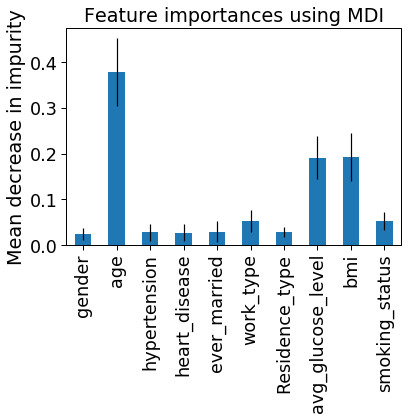

In [29]:
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


# Logistic regression

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

In [31]:
# Create a pipeline that scales the data then trains a logistic regression classifier
lr_pipeline = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
# 5-fold cross validation
# applying the classifier pipeline to the feature and target data
lr_scores = cross_val_score(lr_pipeline, X, y, cv=5)
lr_scores

array([0.78      , 0.72      , 0.74      , 0.73737374, 0.77777778])

In [32]:
print("Logistic Regression clf: %0.2f accuracy with a standard deviation of %0.2f" % (lr_scores.mean(), lr_scores.std()))

Logistic Regression clf: 0.75 accuracy with a standard deviation of 0.02
